# **Improve Call Center Effectiveness Using Machine Learning**

In [1]:
# Import required Libraries
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import tensorflow as tf
# Importing libraries for building CNN models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
import warnings
from joblib import Parallel, delayed
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


In [2]:
# Install Libraries to track the time taken for each step
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.8 MB/s eta 0:00:00
time: 443 µs (started: 2024-07-20 21:54:49 +00:00)


## **Image Processing and Classification**

In [3]:
# Creating directories to store the Images
!mkdir project_images
!pip install bing-image-downloader

time: 16.5 s (started: 2024-07-20 21:54:49 +00:00)


In [4]:
# Downloading the Happy Employees image from the Web
from bing_image_downloader import downloader
downloader.download('Happy call center employees', limit=100, output_dir='project_images', adult_filter_off=True)

[%] Downloading Images to /content/project_images/Happy call center employees


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://www.vivocha.com/wp-content/uploads/2017/03/original-happy_call_center_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://media.istockphoto.com/photos/portrait-of-happy-call-center-employees-picture-id157511789?k=6&amp;m=157511789&amp;s=170667a&amp;w=0&amp;h=emAAK_a-qjQ_QeUcvs51t4Bs9gv7CGhbv0BjQeI2Rzc=
[!] Issue getting: https://media.istockphoto.com/photos/portrait-of-happy-call-center-employees-picture-id157511789?k=6&amp;m=157511789&amp;s=170667a&amp;w=0&amp;h=emAAK_a-qjQ_QeUcvs51t4Bs9gv7CGhbv0BjQeI2Rzc=
[!] Error:: HTTP Error 400: Bad Request
[%] Downloading Image #2 from http://p.motionelements.com/stock-video/business/me4724963-happy-call-center-employees-work-south-africa-hd-a0116.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://p.motionelements.com/stock-video/business/me472496

In [5]:
# Downloading the Disappointed Employee images
from bing_image_downloader import downloader
downloader.download('Disappointed call center employees', limit=100, output_dir='project_images', adult_filter_off=True)

[%] Downloading Images to /content/project_images/Disappointed call center employees


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from https://www.goodtherapy.org/blog/blog/wp-content/uploads/2021/02/GettyImages-1089646376-1-800x534.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img.freepik.com/premium-photo/confused-man-call-center-employee-frustrated-telecommunication-professional-help-solve-client-faq-contact-us-crm-problem-telemarketing-consultant-customer-service-staff-online-support_590464-98156.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://static.vecteezy.com/system/resources/previews/012/504/560/non_2x/disappointed-businessman-wearing-headset-having-virtual-team-meeting-group-call-chatting-with-diverse-people-in-customer-support-video-conference-call-on-computer-with-manager-and-employees-free-photo.jpg
[!] Issue getting: https://static.vecteezy.com/system/resources/previews/012/504/560/non_2x/disappoin

### Validating the downloaded Images

```
# This is formatted as code
```



In [6]:
# Creating the list of Valid File Extension types
image_extensions = ['jpeg','jpg', 'bmp', 'png']
# Checking the validity of the downloaded images
for image_folders in os.listdir('project_images'):
  for image in os.listdir(os.path.join('project_images', image_folders)):
    image_path = os.path.join(os.path.join('project_images', image_folders), image)
    try:
      img = imread(image_path)
      ext = imghdr.what(image_path)
      # Remove the images if the extension is not of the right file type
      if ext not in image_extensions:
        os.remove(image_path)
    except Exception as exception:
      print(f'Issue while reading the image {image_path}')

time: 4.23 s (started: 2024-07-20 21:56:36 +00:00)


In [7]:
# Checking the number of images in each directory
print(len(os.listdir('project_images/Happy call center employees')))
print(len(os.listdir('project_images/Disappointed call center employees')))

99
98
time: 6.79 ms (started: 2024-07-20 21:56:41 +00:00)


### Verifying the images downloaded

In [8]:
# Creating a Input Dataset from the Images downloaded with Batch size set to 20 and Image size of 256x256
input_data=tf.keras.utils.image_dataset_from_directory('project_images', batch_size=20, image_size=(256,256), shuffle=True)

Found 197 files belonging to 2 classes.
time: 153 ms (started: 2024-07-20 21:56:41 +00:00)


In [9]:
# Creating a Generator of the Input Images
data_input_generator = input_data.as_numpy_iterator()
next_batch= data_input_generator.next()
# Printing the shape of the First batch in the Generator.
next_batch[0].shape


(20, 256, 256, 3)

time: 3.5 s (started: 2024-07-20 21:56:41 +00:00)


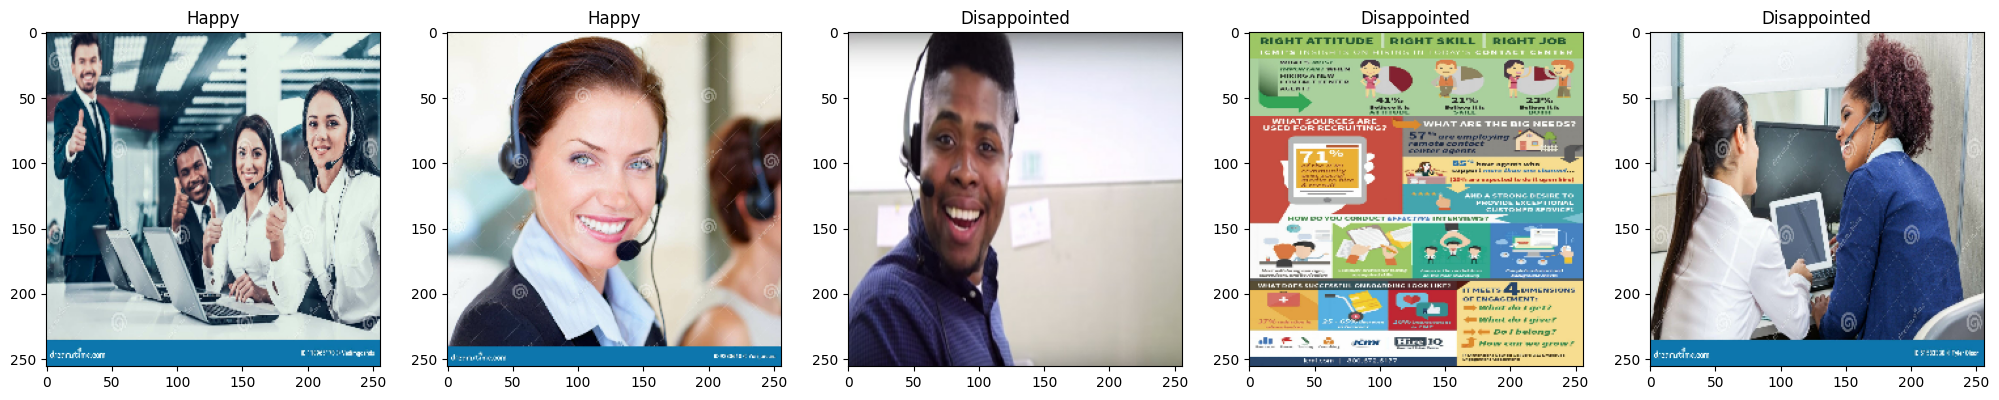

time: 1.96 s (started: 2024-07-20 21:56:44 +00:00)


In [10]:
# Plotting the top 5 images from the First Batch
fig,ax= plt.subplots(ncols=5, figsize=(25,25))
for idx, img in enumerate(next_batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  if next_batch[1][idx]==0:
    ax[idx].title.set_text('Disappointed')
  else:
    ax[idx].title.set_text('Happy')
  #ax[idx].title.set_text(next_batch[1][idx])


### Scaling the data

In [11]:
# Scaling the Input Data so the values range from 0 to 1
scaled_data=input_data.map(lambda x,y: (x/255, y))

time: 47.2 ms (started: 2024-07-20 21:56:46 +00:00)


In [12]:
# Creating a Generator Object on the Scaled data
scaled_data_generator = scaled_data.as_numpy_iterator()
scaled_batch = scaled_data_generator.next()
next_batch= scaled_data_generator.next()
next_batch[0].shape

(20, 256, 256, 3)

time: 2.6 s (started: 2024-07-20 21:56:46 +00:00)


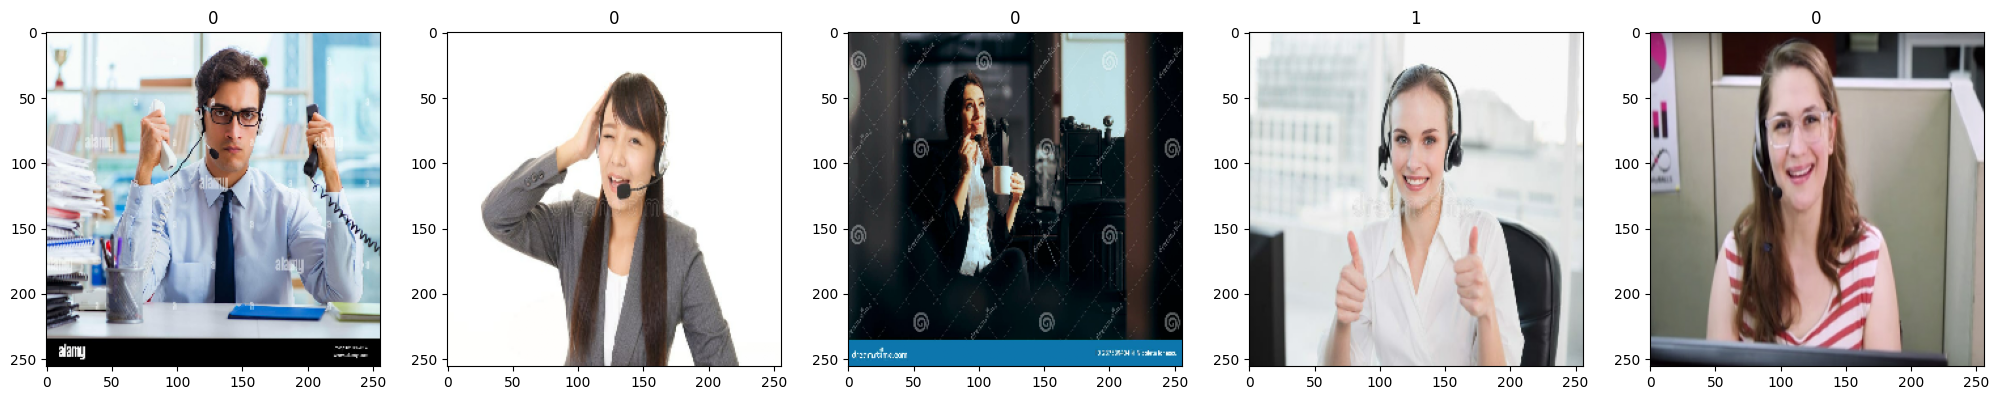

time: 1.78 s (started: 2024-07-20 21:56:49 +00:00)


In [13]:
# Plotting the top 5 images from the First Batch of Sclaed Data
fig,ax= plt.subplots(ncols=5, figsize=(25,25))
for idx, img in enumerate(next_batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(next_batch[1][idx])

### Splitting the data into Train, Test and Validation groups

In [14]:
# Creating a Training Batch
train_batch_cnt = round(len(scaled_data)*.6)
train_batch_cnt


6

time: 6.54 ms (started: 2024-07-20 21:56:51 +00:00)


In [15]:
# Creating a Validation Batch
validation_batch_cnt = int(len(scaled_data)*.2)
validation_batch_cnt

2

time: 7.52 ms (started: 2024-07-20 21:56:51 +00:00)


In [16]:
# Creating a Test Batch
test_batch_cnt = int(len(scaled_data)*.2)
test_batch_cnt

2

time: 4.97 ms (started: 2024-07-20 21:56:51 +00:00)


In [17]:
# Assigning Images to the batches
train_data = scaled_data.take(train_batch_cnt)
validation_data = scaled_data.skip(train_batch_cnt).take(validation_batch_cnt)
test_data = scaled_data.skip(train_batch_cnt+validation_batch_cnt).take(test_batch_cnt)
# Printing the Lengths of each Batch
len(train_data), len(validation_data), len(test_data)

(6, 2, 2)

time: 17.9 ms (started: 2024-07-20 21:56:51 +00:00)


### Building Image Classification Models

### Convolutional Neural Network Model 1

In [18]:
# Creating a CNN Model and adding multiple Hidden layers on top of it
image_model1 = Sequential()
# First Convolution and Max Pooling block
image_model1.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
image_model1.add(MaxPooling2D())

# Second Convolution and Max Pooling block
image_model1.add(Conv2D(32, (3,3), 1, activation='relu'))
image_model1.add(MaxPooling2D())

# Third Convolution and Max Pooling block
image_model1.add(Conv2D(16, (3,3), 1, activation='relu'))
image_model1.add(MaxPooling2D())

# Flattening the data before extracting the final outcome
image_model1.add(Flatten())

# Adding a fully connected layer with 256 neurons
image_model1.add(Dense(256, activation='relu'))

# Adding a Sigmoid layer as the final outcome is a binary output
image_model1.add(Dense(1, activation='sigmoid'))

time: 258 ms (started: 2024-07-20 21:56:51 +00:00)


In [19]:
# Adding Adam as the compiler and Binary Cross Entropy as there are only 2 Target variables
image_model1.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

time: 30.8 ms (started: 2024-07-20 21:56:51 +00:00)


In [20]:
# Printing the summary of the Image classification Model
image_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### Training the CNN Image Classification Model

In [21]:
# Creating a Directory to store the MOdel logs
!mkdir model_logs
# Creating a Call back while training the model
image_model1_callback = tf.keras.callbacks.TensorBoard(log_dir='model_logs')
# Training the model with 20 Epochs
history_image_model1 = image_model1.fit(train_data, epochs=20, validation_data=validation_data, callbacks=[image_model1_callback])

Epoch 1/20
6/6 [==============================] - 15s 2s/step - loss: 0.9611 - accuracy: 0.5083 - val_loss: 0.6726 - val_accuracy: 0.5250
Epoch 2/20
6/6 [==============================] - 13s 2s/step - loss: 0.6547 - accuracy: 0.5667 - val_loss: 0.6028 - val_accuracy: 0.6000
Epoch 3/20
6/6 [==============================] - 17s 2s/step - loss: 0.5995 - accuracy: 0.6500 - val_loss: 0.5304 - val_accuracy: 0.7500
Epoch 4/20
6/6 [==============================] - 17s 2s/step - loss: 0.4715 - accuracy: 0.7833 - val_loss: 0.3571 - val_accuracy: 0.8500
Epoch 5/20
6/6 [==============================] - 13s 2s/step - loss: 0.3643 - accuracy: 0.8333 - val_loss: 0.2931 - val_accuracy: 0.8500
Epoch 6/20
6/6 [==============================] - 14s 2s/step - loss: 0.3698 - accuracy: 0.8417 - val_loss: 0.2271 - val_accuracy: 0.8750
Epoch 7/20
6/6 [==============================] - 14s 2s/step - loss: 0.3116 - accuracy: 0.8833 - val_loss: 0.1895 - val_accuracy: 0.9750
Epoch 8/20
6/6 [==================

time: 5min 8s (started: 2024-07-20 21:56:51 +00:00)


### Plot the Image Classification Model Performance

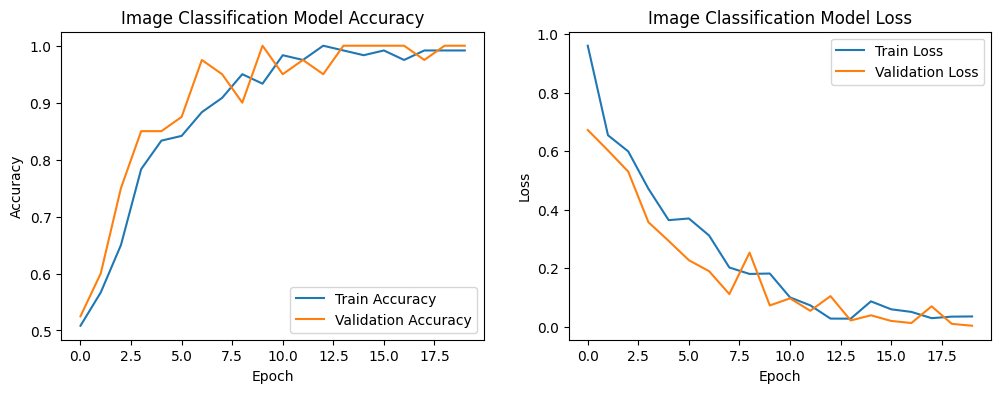

time: 524 ms (started: 2024-07-20 22:02:00 +00:00)


In [22]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_image_model1.history['accuracy'], label='Train Accuracy')
plt.plot(history_image_model1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Image Classification Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# Loss
plt.subplot(1, 2, 2)
plt.plot(history_image_model1.history['loss'],  label='Train Loss')
plt.plot(history_image_model1.history['val_loss'], label='Validation Loss')
plt.title('Image Classification Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

### Evaluate the Model Performance

In [23]:
# Calculating the evaluation Metrics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

time: 34.6 ms (started: 2024-07-20 22:02:01 +00:00)


In [24]:
# Looping through the Images in the Test batch and evaluating the performance
for test_batch in test_data.as_numpy_iterator():
    X, y = test_batch
    yhat = image_model1.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)
print(precision.result(), recall.result(), accuracy.result())

1/1 [==============================] - 0s 274ms/step
tf.Tensor(0.9375, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.972973, shape=(), dtype=float32)
time: 4.78 s (started: 2024-07-20 22:02:01 +00:00)


### Testing the Image classification Model1

In [25]:
# Downloading images for Testing purposes
downloader.download('Disappointed call center employees', limit=2,  adult_filter_off=True)
downloader.download('Happy call center employees', limit=2,  adult_filter_off=True)

[%] Downloading Images to /content/dataset/Disappointed call center employees


[!!]Indexing page: 1

[%] Indexed 2 Images on Page 1.


[%] Downloading Image #1 from https://www.goodtherapy.org/blog/blog/wp-content/uploads/2021/02/GettyImages-1089646376-1-800x534.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://img.freepik.com/premium-photo/confused-man-call-center-employee-frustrated-telecommunication-professional-help-solve-client-faq-contact-us-crm-problem-telemarketing-consultant-customer-service-staff-online-support_590464-98156.jpg
[%] File Downloaded !



[%] Done. Downloaded 2 images.
[%] Downloading Images to /content/dataset/Happy call center employees


[!!]Indexing page: 1

[%] Indexed 2 Images on Page 1.


[%] Downloading Image #1 from https://www.vivocha.com/wp-content/uploads/2017/03/original-happy_call_center_.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://media.istockphoto.com/photos/portrait-of-happy-call-center-employees-picture-id15

In [26]:
def predict_sentiment(resized):
  # This function predicts the Emotion by rescaling the Image and returning the Predictions
  yhat_image = image_model1.predict(np.expand_dims(resized/255, 0))
  if yhat_image < 0.5:
      print(f'Employee appears to be Stressed')
      return("Stressed")
  else:
      print(f'Employee is having a nice conversation! Everything seems Normal.')
      return("Happy")

def test_employee_sentiment(imagepath):
  # This function takes the path of the Image, resizes and rescaled and finally prints the emotion.
  image_path = imagepath
  testing_img = cv2.imread(image_path)
  # Converting the color scale for Display purposes
  plt.imshow(cv2.cvtColor(testing_img, cv2.COLOR_BGR2RGB))
  plt.show()
  resize = tf.image.resize(testing_img, (256,256))
  resize_np=resize.numpy().astype(int)
  # Calls Predict function to predict the sentiment
  predicted_employee_sentiment=predict_sentiment(resize_np)
  return predicted_employee_sentiment


time: 962 µs (started: 2024-07-20 22:02:08 +00:00)


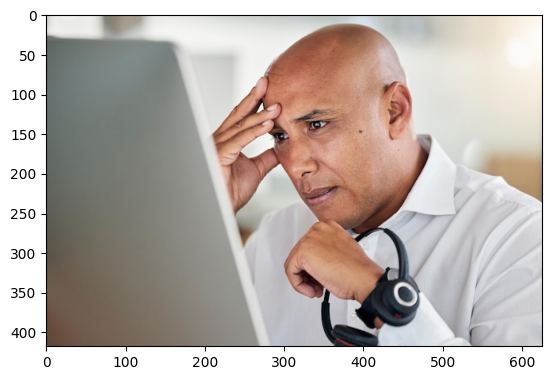

1/1 [==============================] - 0s 46ms/step
Employee appears to be Stressed


'Stressed'

time: 664 ms (started: 2024-07-20 22:02:08 +00:00)


In [27]:
test_employee_sentiment('dataset/Disappointed call center employees/Image_2.jpg')


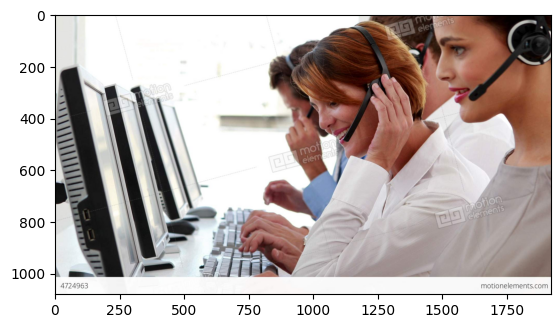

1/1 [==============================] - 0s 131ms/step
Employee is having a nice conversation! Everything seems Normal.


'Happy'

time: 1.18 s (started: 2024-07-20 22:02:09 +00:00)


In [28]:
test_employee_sentiment('dataset/Happy call center employees/Image_2.jpg')

### Saving the Image Classification Model results

In [29]:
# Saving the Model results in the models folder.
from tensorflow.keras.models import load_model
image_model1.save(os.path.join('models','image_model1.h5'))

time: 273 ms (started: 2024-07-20 22:02:10 +00:00)


### Image Classification Model 2 using Scikit Learn

In [30]:
# Importing Required libraries
from skimage.io import imread
from skimage.transform import resize
# Initiating required list to capture the Target variables and IMages converted to Numpy
target_classes=[]
images_numeric=[]
flatten_data= []
image_directory= '/content/project_images/'
emotions=['Disappointed call center employees','Happy call center employees']
# Looping through each image in the directories
for emotion in emotions:
  class_index=emotions.index(emotion)
  # Creating a variable for the path where the images are saved
  image_path=os.path.join(image_directory,emotion)
  for img in os.listdir(image_path):
    # Using Imread to convert the Images into Numpy arrays
    img_array=imread(os.path.join(image_path,img))
    # Resizing the images and flattening the data
    img_resized=resize(img_array,(256,256,3)) # normalizes the data
    flatten_data.append(img_resized.flatten())
    images_numeric.append(img_resized)
    target_classes.append(class_index)
# Converting the Flattened data, Target classes into Numpy arrays
flatten_data=np.array(flatten_data)
target_classes=np.array(target_classes)
images_numeric=np.array(images_numeric)

time: 45.3 s (started: 2024-07-20 22:02:10 +00:00)


In [31]:
# Validating the shape of the flattened Numpy array
flatten_data[0].shape

(196608,)

time: 4.72 ms (started: 2024-07-20 22:02:55 +00:00)


In [32]:
#Validating the Target Classes
target_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 8.52 ms (started: 2024-07-20 22:02:55 +00:00)


In [33]:
# Validating the shape of the Images converted to Numpy array
images_numeric[0].shape

(256, 256, 3)

time: 3.93 ms (started: 2024-07-20 22:02:55 +00:00)


In [34]:
# Split the dataset into Train and Test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flatten_data, target_classes,test_size=0.3, random_state=36)

time: 224 ms (started: 2024-07-20 22:02:55 +00:00)


### Hyper Parameter Tuning in SVM Model

In [35]:
# Implement HyperParameter Tuning by creating a Grid of Parameters
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid_svc=[
    {"C":[1,10,100,1000],"kernel":["linear"]},
    {"C":[1,10,100,1000],"gamma":[0,0.001,0.0001],"kernel":["rbf"]}
]
svc=svm.SVC(probability=True)
image_model2=GridSearchCV(svc,param_grid_svc)
# Training the Model
image_model2.fit(x_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0, 0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 21min 23s (started: 2024-07-20 22:02:56 +00:00)


In [36]:
# Predicting the outcome from the test sets
y_pred=image_model2.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

time: 3.62 s (started: 2024-07-20 22:24:19 +00:00)


In [37]:
# Calculating the Accuracy of the SVM model
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6166666666666667

time: 6.17 ms (started: 2024-07-20 22:24:23 +00:00)


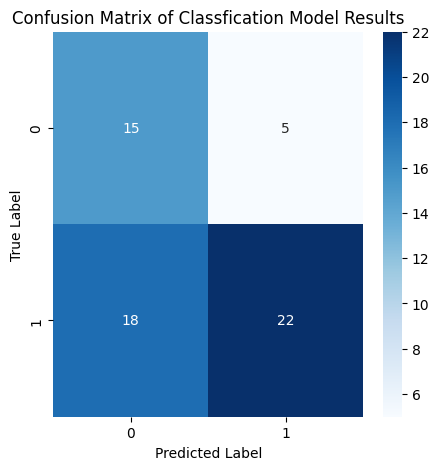

time: 445 ms (started: 2024-07-20 22:24:23 +00:00)


In [38]:
# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_pred,y_test)
# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Classfication Model Results')
plt.show()

In [39]:
# Saving the Model results as a Pickle file
import pickle
pickle.dump(image_model2,open('image_model2.p','wb'))

time: 1.34 s (started: 2024-07-20 22:24:23 +00:00)


# Audio Speech Emotion Classification

In [40]:
# Installing the unzip utility and extract the audio files
!apt install unzip

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
time: 3.54 s (started: 2024-07-20 22:24:25 +00:00)


In [41]:
!ls -ltr

total 646948
drwxr-xr-x 1 root root      4096 Jul 18 13:22 sample_data
drwxr-xr-x 4 root root      4096 Jul 20 21:55 project_images
drwxr-xr-x 4 root root      4096 Jul 20 21:57 model_logs
-rw-r--r-- 1 root root 450102890 Jul 20 22:01 RAVDESS.zip
drwxr-xr-x 4 root root      4096 Jul 20 22:02 dataset
drwxr-xr-x 2 root root      4096 Jul 20 22:02 models
-rw-r--r-- 1 root root 212344057 Jul 20 22:24 image_model2.p
time: 108 ms (started: 2024-07-20 22:24:28 +00:00)


In [42]:
# Extracting the files from the Zip files
!unzip /content/RAVDESS.zip

Archive:  /content/RAVDESS.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Actor_01/03-01-03-02-02-0

In [43]:
# Creating a list of directories to process the images
folder_path='/content/audio_speech_actors_01-24'
folder_list=os.listdir(folder_path)
# Creating a holding list for the File paths and the emotion codes
emotion_codes=[]
file_paths=[]
# Looping through each file in the folder and extracting the emotion codes from the file names
for item in folder_list:
  item_path=os.path.join(folder_path,item)
  files=os.listdir(item_path)
  for file in files:
    file_path=os.path.join(item_path,file)
    emotion_code=int(file.split('.')[0].split('-')[2])
    # Append the Paths of the extracted file and the emotion codes to the respective Lists
    emotion_codes.append(emotion_code)
    file_paths.append(file_path)

time: 12.3 ms (started: 2024-07-20 22:24:47 +00:00)


In [44]:
# Printing top 10 emotion codes to validate the data
emotion_codes[0:10]

[3, 7, 6, 7, 4, 3, 4, 5, 4, 5]

time: 3.27 ms (started: 2024-07-20 22:24:47 +00:00)


In [45]:
# Creating a Dictionary of Emotion codes with the labels
emotion_text={1:'neutral',2:'calm',3:'happy',4:'sad',5:'angry',6:'fearful',7:'disgust',8:'surprised'}

time: 721 µs (started: 2024-07-20 22:24:47 +00:00)


In [46]:
# Extracting the audio paths and the emotions into a Data Frame
audio_data_df=pd.DataFrame(list(zip(file_paths,emotion_codes)),columns=['file_paths','emotion_codes'])
audio_data_df["emotion_labels"]=audio_data_df["emotion_codes"].map(emotion_text)
# Validating top few rows from the Dataframe
audio_data_df.head()

file_paths  emotion_codes  \
0  /content/audio_speech_actors_01-24/Actor_03/03...              3   
1  /content/audio_speech_actors_01-24/Actor_03/03...              7   
2  /content/audio_speech_actors_01-24/Actor_03/03...              6   
3  /content/audio_speech_actors_01-24/Actor_03/03...              7   
4  /content/audio_speech_actors_01-24/Actor_03/03...              4   

  emotion_labels  
0          happy  
1        disgust  
2        fearful  
3        disgust  
4            sad

time: 101 ms (started: 2024-07-20 22:24:47 +00:00)


In [47]:
# Create a pivot table of emotions data
emotion_pivot = audio_data_df.pivot_table(index='emotion_labels', columns='emotion_codes', values='file_paths', aggfunc='count').fillna(0).astype(int)
emotion_pivot


emotion_codes    1    2    3    4    5    6    7    8
emotion_labels                                       
angry            0    0    0    0  192    0    0    0
calm             0  192    0    0    0    0    0    0
disgust          0    0    0    0    0    0  192    0
fearful          0    0    0    0    0  192    0    0
happy            0    0  192    0    0    0    0    0
neutral         96    0    0    0    0    0    0    0
sad              0    0    0  192    0    0    0    0
surprised        0    0    0    0    0    0    0  192

time: 48.8 ms (started: 2024-07-20 22:24:47 +00:00)


In [48]:
# Validating the emotion labels distribution
emot_cnts=audio_data_df["emotion_labels"].value_counts()

time: 1.83 ms (started: 2024-07-20 22:24:47 +00:00)


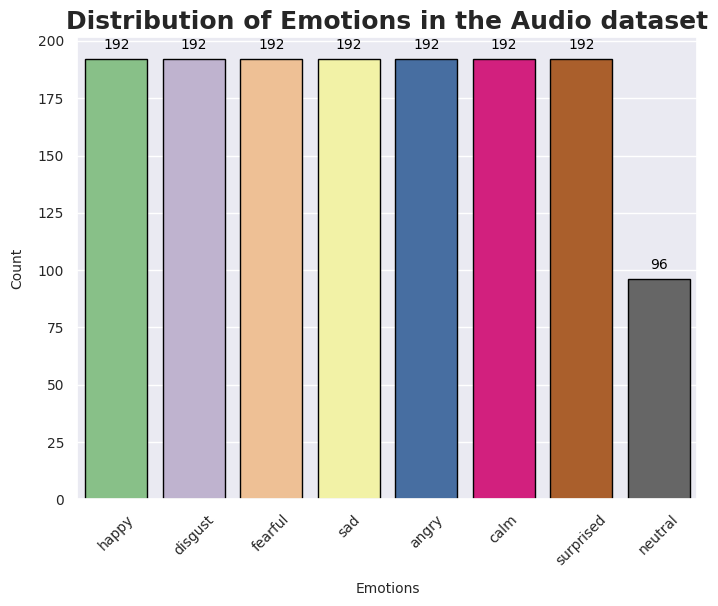

time: 474 ms (started: 2024-07-20 22:24:47 +00:00)


In [49]:
# Plotting the emotion labels distribution
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")
bplot=sns.barplot(x=emot_cnts.index, y=emot_cnts.values, palette='Accent', edgecolor='black')
plt.title('Distribution of Emotions in the Audio dataset', fontsize=18, fontweight='bold')
plt.xlabel('Emotions', fontsize=10, labelpad=10)
plt.ylabel('Count', fontsize=10, labelpad=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
# Add count labels on each bar
for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points', fontsize=10, color='black')

plt.show()

In [50]:
# Function to plot the WavePlot of Audio data
def plot_waveplot(input_data, sample_rate, emotion):
    plt.figure(figsize=(10,5))
    plt.title(f'Waveplot of {emotion}', size=18)
    plt.xlabel('Time (secs)')
    plt.ylabel('Amplitude')
    librosa.display.waveshow(input_data, sr=sample_rate)
    plt.show()

# Function to plot the Spectrogram of Audio data
def plot_spectrogram(input_data, sample_rate, emotion):
    fourier_data = librosa.stft(input_data)
    fourier_data_db = librosa.amplitude_to_db(abs(fourier_data))
    plt.figure(figsize=(10,5))
    plt.title(f'Spectrogram of {emotion}', size=18)
    librosa.display.specshow(fourier_data_db, sr=sample_rate, x_axis='time', y_axis='hz')
    plt.xlabel('Time (Secs)')
    plt.ylabel('Frequency')
    plt.colorbar()

# Function to plot Mel Spectrogram on Sample data
def plot_mel_spectrogram(input_data, sample_rate, emotion):
  mel_spec = librosa.feature.melspectrogram(y=input_data, sr=sample_rate, n_mels=128)
  mel_spec_DB = librosa.amplitude_to_db(mel_spec, ref=np.max)
  plt.figure(figsize=(10, 5))
  librosa.display.specshow(mel_spec_DB, sr=sample_rate, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.title(f'Mel Spectrogram of {emotion}',  size=18)
  plt.xlabel('Time (Secs)')
  plt.ylabel('Mel Frequency')
  plt.show()

time: 1.89 ms (started: 2024-07-20 22:24:47 +00:00)


In [ ]:
# Validating a Sample Audio file by plotting Waveplots and Spectrograms
sample_path=audio_data_df['file_paths'][200]
sample_input_data=librosa.load(sample_path)[0]
sample_sr=librosa.load(sample_path)[1]
sample_emotion=audio_data_df['emotion_labels'][200]

In [ ]:
# Plotting Waveplot on sample Audio
plot_waveplot(sample_input_data, sample_sr, sample_emotion)

In [ ]:
Audio(sample_input_data, rate=sample_sr)

In [ ]:
# Plotting Spectrogram on sample Audio
plot_spectrogram(sample_input_data, sample_sr, sample_emotion)

In [ ]:
# Plotting Mel Spectrogram on sample Audio
plot_mel_spectrogram(sample_input_data, sample_sr, sample_emotion)

### Feature Extraction of the Audio Data

In [ ]:
# Declaring the Frame Length and Hop Length
frm_len=2048
hop_len=512

# Function to Extract the Zero Crossing Rates
def zero_crossing_rate(input_data):
  zero_cross_flat=librosa.feature.zero_crossing_rate(input_data, frame_length=frm_len, hop_length=hop_len).flatten()
  return zero_cross_flat

# Function to Extract the Root Mean Squares
def calculate_rms(input_data):
  rms_flat=librosa.feature.rms(y=input_data, frame_length=frm_len, hop_length=hop_len).flatten()
  return rms_flat

# Function to Extract MFCC
def mfcc(input_data, sample_rate, n_mfcc=13, flatten=True):
  mfcc_features = librosa.feature.mfcc(y=input_data, sr=sample_rate, n_mfcc=n_mfcc, hop_length=hop_len)
  if flatten:
    return mfcc_features.flatten()
  else:
    return mfcc_features

# Function to Extract Chroma Features
def chroma_stft(input_data, sample_rate):
  chroma_features = librosa.feature.chroma_stft(y=input_data, sr=sample_rate, hop_length=hop_len)
  chroma_features_flat = chroma_features.T.flatten()
  return chroma_features_flat

# Function to Extract Spectral Contrast Features
def spectral_contrast( input_data, sample_rate):
  contrast_features = librosa.feature.spectral_contrast(y=input_data, sr=sample_rate, hop_length=hop_len)
  contrast_features_flat = contrast_features.T.flatten()
  return contrast_features_flat

# Function to Extract Mel Spectrogram Features
def mel_spectrogram(input_data, sample_rate):
  mel_features = librosa.feature.melspectrogram(y=input_data, sr=sample_rate, hop_length=hop_len)
  mel_features_flat = mel_features.flatten()
  return mel_features_flat

# Extracting all the features, flatten and concatenate them
def extract_base_features( input_data, sample_rate):
  zero_cross_feat = zero_crossing_rate(input_data)
  rms_feat = calculate_rms(input_data)
  mfcc_feat = mfcc(input_data, sample_rate)
  chroma_feat = chroma_stft(input_data, sample_rate)
  spectralcontrast_feat = spectral_contrast(input_data, sample_rate)
  melspectrogram_feat = mel_spectrogram(input_data, sample_rate)
  return np.concatenate([zero_cross_feat,
                                rms_feat,
                                mfcc_feat,
                                chroma_feat,
                                spectralcontrast_feat,
                                melspectrogram_feat])

# Function to add random noise to the extracted data
def add_noise(input_data, noisefac=0.005):
  noiseamplitude = noisefac * np.random.uniform() * np.max(input_data)
  added_noise = input_data + noiseamplitude * np.random.normal(size=input_data.shape[0])
  return added_noise

# Function to add random Pitch to the extracted data
def add_pitch(input_data, sample_rate, num_steps=4):
  added_pitch = librosa.effects.pitch_shift(y=input_data, sr=sample_rate, n_steps=num_steps)
  return added_pitch

In [ ]:
# Calls the Base extract Function to pull all features and add Noise and Pitch to it.
def add_noise_and_pitch( input_path, drn=2.5, off=0.6):
    extracted_features =[]
    # Converting the Audio data into Numpy arrays
    input_data, sample_rate = librosa.load(input_path, duration=drn, offset=off)
    # Calling the Base extract function and append the extracted features to the list
    extracted_features.append(extract_base_features(input_data, sample_rate))
    # Adding Noise
    audio_with_noise = add_noise(input_data)
    extracted_features.append(extract_base_features(audio_with_noise, sample_rate))
    # Adding Pitch
    audio_with_pitch = add_pitch(input_data, sample_rate)
    extracted_features.append(extract_base_features(audio_with_pitch, sample_rate))
    audio_with_pitched_noise = add_noise(audio_with_pitch)
    extracted_features.append(extract_base_features(audio_with_pitched_noise, sample_rate))
    # Returning the features
    return np.array(extracted_features)

# This function will create a final list of all extracted features for all input files that are in Numpy array format
def extract_all_features(input_path, emotion):
        extracted_features = add_noise_and_pitch(input_path)
        # Converting the final features to List
        X_list1 = extracted_features.tolist()
        # Creating a list of emotion codes for example: [2,2,2,2]
        Y_list1 = [emotion] * len(extracted_features)
        return X_list1, Y_list1

# Final data Processing function that takes the Input dataframe as input and returns final Numpy array for Machine Learning Model Building
def data_processing(input_df, n_jobs=-1):
        # Extract the list of all Audio files
        paths = input_df['file_paths'].values
        all_emotions = input_df['emotion_codes'].values
        # Using Parallel and delayed methods of joblib library to speed up the process
        processed_results = Parallel(n_jobs=n_jobs)(delayed(extract_all_features)(path, emotion) for path, emotion in zip(paths, all_emotions))
        # Flatten the results
        X_list2, Y_list2 = [], []
        for res in processed_results:
            X_list2.extend(res[0])
            Y_list2.extend(res[1])
        # Finding the Max Length
        max_x_val = max(len(x_val) for x_val in X_list2)
        # Pad or truncate sequences to the same length
        X_list3 = ([np.pad(x_val2, (0, max_x_val - len(x_val2)), 'constant') if len(x_val2) < max_x_val else x_val2[:max_x_val] for x_val2 in X_list2])
        return np.array(X_list3), np.array(Y_list2)

In [ ]:
# Passing the Audio Data Frame as input that will process and return the final Numpy Arrays
X_array, Y_array = data_processing(audio_data_df)
print(X_array.shape, Y_array.shape)

In [ ]:
# Creating a Scaler Object and using it on the X Array to scale the Data
scaler = StandardScaler()
X_array = scaler.fit_transform(X_array)
# Encode the labels
label_encoder = LabelEncoder()
# Applying the encoder on the Target Variable
Y_array = label_encoder.fit_transform(Y_array)
# Finding the Number of Unique emotions
num_emotions = len(np.unique(Y_array))
# Converting the emotions to Categorical data
Y_array = to_categorical(Y_array, num_classes=num_emotions)
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_array, Y_array, test_size=0.2, random_state=36)
# Reshape the data for CNN (adding an extra dimension for channels)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))
# Printing the Final shape of the Dataframes
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

### Building Speech Emotion Classification Model

In [ ]:
# Building CNN Model for Speech Emotion Recognition
input_shape=X_train.shape[1:]
# Calling the Sequential API
cnn_model = Sequential()

# Adding first Convolutional and MaxPool layer
cnn_model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
cnn_model.add(MaxPooling2D((2, 1)))

# Adding second Convolutional and MaxPool layer
cnn_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D((2, 1)))

# Adding third Convolutional and MaxPool layer
cnn_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D((2, 1)))

# Adding fourth Convolutional and MaxPool layer
cnn_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(MaxPooling2D((2, 1)))

# Adding Flatten Layer
cnn_model.add(Flatten())

#cnn_model.add(Dense(32, activation='relu'))


# Adding Dense Layers, Relu is used as an Activation function
cnn_model.add(Dense(128, activation='relu'))
# Adding Softmax Function as this is a Multilevel Classification Model
cnn_model.add(Dense(num_emotions, activation='softmax'))

# Using Adam as the Optimizer and Accuracy as Evaluation Metric
cnn_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the Model Summary
cnn_model.summary()


In [61]:
# Train the model
history = cnn_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))
# Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, Y_test)
print(f'Test Accuracy: {accuracy}')

Epoch 1/10
144/144 [==============================] - 367s 3s/step - loss: 1.4144 - accuracy: 0.4698 - val_loss: 1.0323 - val_accuracy: 0.6250
Epoch 2/10
144/144 [==============================] - 354s 2s/step - loss: 0.6977 - accuracy: 0.7563 - val_loss: 0.6888 - val_accuracy: 0.7734
Epoch 3/10
144/144 [==============================] - 380s 3s/step - loss: 0.3210 - accuracy: 0.8930 - val_loss: 0.4704 - val_accuracy: 0.8542
Epoch 4/10
144/144 [==============================] - 381s 3s/step - loss: 0.1833 - accuracy: 0.9494 - val_loss: 0.3816 - val_accuracy: 0.8811
Epoch 5/10
144/144 [==============================] - 356s 2s/step - loss: 0.0769 - accuracy: 0.9848 - val_loss: 0.4405 - val_accuracy: 0.8889
Epoch 6/10
144/144 [==============================] - 378s 3s/step - loss: 0.0939 - accuracy: 0.9796 - val_loss: 0.4616 - val_accuracy: 0.8863
Epoch 7/10
144/144 [==============================] - 358s 2s/step - loss: 0.0826 - accuracy: 0.9809 - val_loss: 0.4008 - val_accuracy: 0.9071

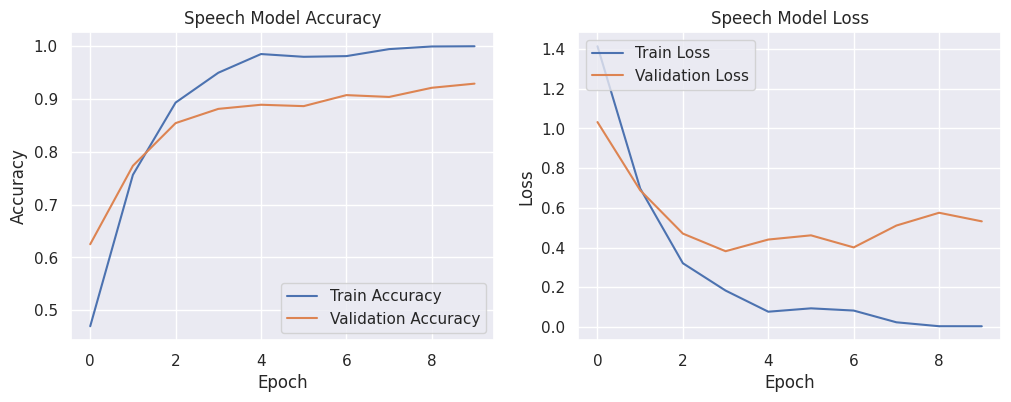

time: 647 ms (started: 2024-07-20 23:34:17 +00:00)


In [62]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Speech Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Speech Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()

36/36 [==============================] - 21s 582ms/step


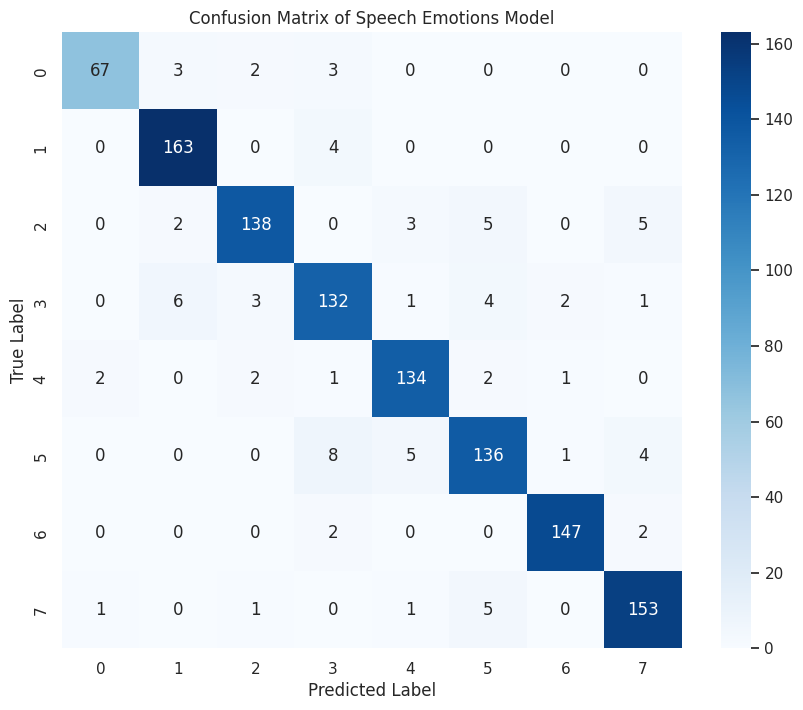

time: 42.5 s (started: 2024-07-20 23:34:18 +00:00)


In [63]:
# Predict the values from the test set
Y_pred = cnn_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_test, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Speech Emotions Model')
plt.show()
cnn_model.save("cnn_model_2.1_.h5")

In [ ]:
# Function to Test the Speech Classification. It takes the Audio file path and the Model Name as Input
def test_speech_classification(input_path,speech_model):
  # Extracting the features from the Audio file
  extracted_features=add_noise_and_pitch(input_path)
  # Scale the features
  scaled_features = scaler.transform(extracted_features)
  # Reshape the features for the model
  scaled_features = scaled_features.reshape((scaled_features.shape[0], scaled_features.shape[1], 1, 1))
  # Predict the emotion
  predicted_vals = speech_model.predict(scaled_features)
  predicted_emotion = label_encoder.inverse_transform(np.argmax(predicted_vals, axis=1))
  # Returning the Predicted Emotions
  return predicted_emotion[0], predicted_vals[0]


In [ ]:
# Function to display audio, plot waveform, and predict emotion of a Random file selected
def test_audio_file(file_num):
    # Extracting the File Path
    input_file_path = audio_data_df['file_paths'].iloc[file_num]
    # Creating Numpy Array from the Audio Data
    audio_array, sample_rate = librosa.load(input_file_path)
    # Display the audio player
    ipd.display(ipd.Audio(data=audio_array, rate=sample_rate))
    # Predict the emotion
    predicted_emotion, org_emo = test_speech_classification(input_file_path, cnn_model )
    original_emotion_text = audio_data_df['emotion_labels'].iloc[file_num]
    predicted_emotion_text= emotion_text[predicted_emotion]
    # Plot the waveform with the predicted emotion as the title
    plt.figure(figsize=(10, 5))
    librosa.display.waveshow(audio_array, sr=sample_rate)
    plt.title(f' {predicted_emotion_text}', fontsize=20)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    original_emotion_text = audio_data_df['emotion_labels'].iloc[file_num]
    predicted_emotion_text= emotion_text[predicted_emotion]
    print(f'Original Emotion: {original_emotion_text}')
    print(f'Predicted Emotion: {predicted_emotion_text}')

#### Testing the model results

1/1 [==============================] - 0s 212ms/step


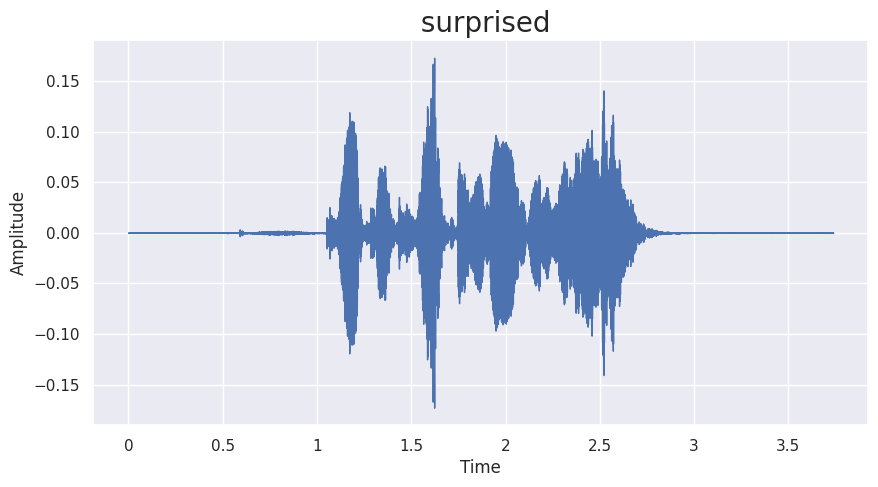

Original Emotion: surprised
Predicted Emotion: surprised
time: 1.57 s (started: 2024-07-20 23:35:01 +00:00)


In [66]:
# Testing the Emotions model with a random Audio file by specifying the File Number
test_audio_file(702)

In [67]:
# Testing a sample file
test_file_path='/content/Actor_24/03-01-03-02-01-01-24.wav'
audio_array, sample_rate = librosa.load(test_file_path)
# Playing the sample file
ipd.display(ipd.Audio(data=audio_array, rate=sample_rate))

time: 19.2 ms (started: 2024-07-20 23:35:02 +00:00)


In [68]:
# Function that takes the path of the file and Emotion Classification model name as Input and Predicts emotion
def test_customer_emotion(input_path,speech_model):
  # Extracting the Original emotion from the audio file
  original_emotion_ind = int(input_path.split('.')[0].split('-')[2])
  original_emotion_label=emotion_text[original_emotion_ind]
  print(f"The Original Emotion is {original_emotion_label}")
  # Predicting the emotion
  predicted_customer_emotion, emot = test_speech_classification(input_path,cnn_model)
  predicted_customer_emotion_label=emotion_text[predicted_customer_emotion]
  print(f"The Predicted Emotion is {predicted_customer_emotion_label}")
  return predicted_customer_emotion_label

time: 989 µs (started: 2024-07-20 23:35:02 +00:00)


In [69]:
# Testing the model on a sample file
predicted_emotion_text=test_customer_emotion(test_file_path,cnn_model)

The Original Emotion is happy
1/1 [==============================] - 0s 100ms/step
The Predicted Emotion is happy
time: 684 ms (started: 2024-07-20 23:35:02 +00:00)


### Combining Both Image and Emotion Classification Model Results

The Original Emotion is angry
1/1 [==============================] - 0s 113ms/step
The Predicted Emotion is angry


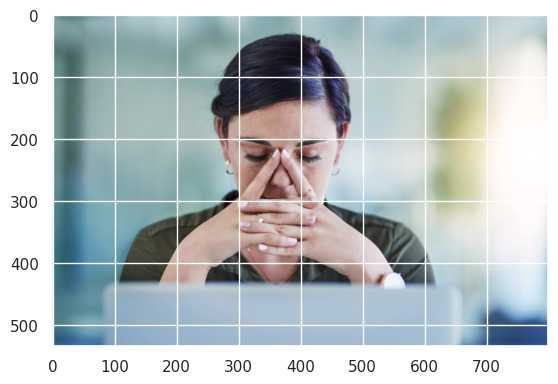

1/1 [==============================] - 0s 50ms/step
Employee appears to be Stressed

  The Customer appears to be Stressed! Try using pleasing and Constructive choice of words. 
  Refer https://www.zendesk.com/blog/the-best-templates-for-dealing-with-angry-customers/
    
time: 1.12 s (started: 2024-07-20 23:35:03 +00:00)


In [70]:
# Combining the output of Image and Speech emotion models
employee_image_path="/content/dataset/Disappointed call center employees/Image_1.jpg"
customer_emotion_path="/content/Actor_07/03-01-05-02-02-02-07.wav"
# Predicting the Customer Emotion
predicted_emotion_text=test_customer_emotion(customer_emotion_path,cnn_model)
# Predicting the Employee sentiment
predicted_employee_sentiment=test_employee_sentiment(employee_image_path)
if predicted_employee_sentiment in ["Stressed"]:
  if predicted_emotion_text in  ["angry","fearful","disgust"]:
    print("""
  The Customer appears to be Stressed! Try using pleasing and Constructive choice of words.
  Refer https://www.zendesk.com/blog/the-best-templates-for-dealing-with-angry-customers/
    """)
  else:
    print("You Seem to be Stressed! Need additional Assistance?")
else:
    print("The Customer seems to be Pleased!Keep Going! You are doing a Great Job!")


The Original Emotion is neutral
1/1 [==============================] - 0s 91ms/step
The Predicted Emotion is neutral


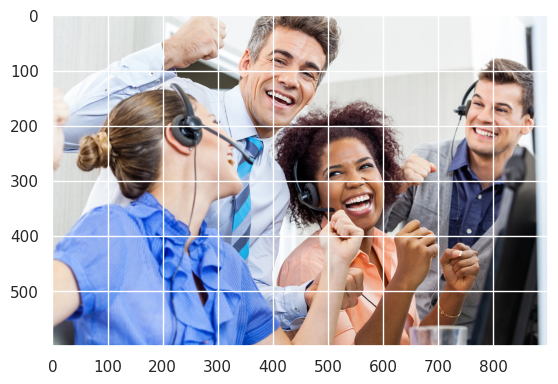

1/1 [==============================] - 0s 96ms/step
Employee is having a nice conversation! Everything seems Normal.
The Customer seems to be Pleased!Keep Going! You are doing a Great Job!
time: 1.25 s (started: 2024-07-20 23:35:04 +00:00)


In [71]:
# Testing the outcome for another sample
employee_image_path2="/content/dataset/Happy call center employees/Image_1.jpg"
customer_emotion_path2="/content/Actor_01/03-01-01-01-01-02-01.wav"
predicted_emotion_text=test_customer_emotion(customer_emotion_path2,cnn_model)
predicted_employee_sentiment=test_employee_sentiment(employee_image_path2)
if predicted_employee_sentiment in ["Stressed"]:
  if predicted_emotion_text in  ["angry","fearful","disgust"]:
    print("The Customer appears to be Stressed! Try using pleasing and Constructive choice of words. Refer https://www.zendesk.com/blog/the-best-templates-for-dealing-with-angry-customers/")
  else:
    print("You Seem to be Stressed! Need additional Assistance?")
else:
    print("The Customer seems to be Pleased!Keep Going! You are doing a Great Job!")


# Validating Model results with BERT Natural Language Processing Model

In [72]:
# Downloading required libraries
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
import re
import numpy as np
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

time: 7.17 s (started: 2024-07-20 23:35:05 +00:00)


In [73]:
# Downloading the Pre trained BERT Model for Validations
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
bert_model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

time: 29 s (started: 2024-07-20 23:35:12 +00:00)


In [ ]:
# Installing whisper package to extract Text from the Audio file
!pip install git+https://github.com/openai/whisper.git
!pip install ffmpeg

In [ ]:
# Importing the Whisper Library
import whisper
whisper_model = whisper.load_model("base")
# Creating a dictionary of emotions
emotions_dict={1:'Extremely Unpleasent',2:'Unpleasent',3:'neutral',4:'Happy',5:'Very Happy'}

In [ ]:
#  Extracting the text from the Audio File using Whisper Library
whisper_result1=whisper_model.transcribe(customer_emotion_path2, fp16=False)
print(f" The Extracted text from the Audio: {whisper_result1['text']}")

In [ ]:
# Encoding the Tokens
tokens_1 = tokenizer.encode(whisper_result1['text'], return_tensors='pt')

In [78]:
# Applying BERT model on the extracted tokens
text_result1 = bert_model(tokens_1)
# Getting the Integer value of the predicted results
int_result1=int(torch.argmax(text_result1.logits))+1
# Extracting Emotion label
emotion_result1=emotions_dict[int_result1]
print(f" The Sentiment Predicted: {emotion_result1}")

 The Sentiment Predicted: Happy
time: 844 ms (started: 2024-07-20 23:38:09 +00:00)


#### The BERT NLP Model predicts the outcome as "Happy" which is similar to the outcome of the Image classification & Emotion recognition model